Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implement Linear Regression

In [2]:
class LinearRegression:
    # Initialization of the model
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        self.mse_history = []

    # Training the model
    def fit(self, X, y):
        n_samples,m_features = X.shape
        self.w = np.zeros(m_features)
        self.b = 0

        # Gradient descent loop
        for _ in range(self.epochs):
            # Compute predictions
            y_pred = X.dot(self.w) + self.b

            # Compute gradients
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Track MSE
            mse = np.mean((y - y_pred) ** 2)
            self.mse_history.append(mse)
    
    # Predicting new data
    def predict(self, X):
        return X.dot(self.w) + self.b
    
    # Compute Mean Squared Error
    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

Testing

In [3]:
# Simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 * X.squeeze() + 3 + np.random.randn(100)  # y = 4x + 3 + noise

Train the model

In [10]:
# Initialize the model
model = LinearRegression(lr=0.03, epochs=1000)

# Train the model
model.fit(X, y)

# Display learned parameters
print(f"Learned Weight: {model.w}")
print(f"Learned Bias: {model.b}")

Learned Weight: [3.77011136]
Learned Bias: 3.2150984510942853


Visualization

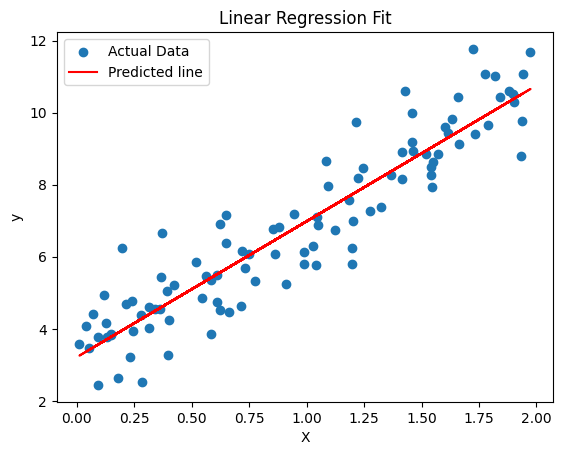

In [11]:
# Prediction
y_pred = model.predict(X)

# Plotting Predictions vs Data
plt.scatter(X,y, label="Actual Data")
plt.plot(X, y_pred, color="red", label="Predicted line")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()

Plotting Training Loss

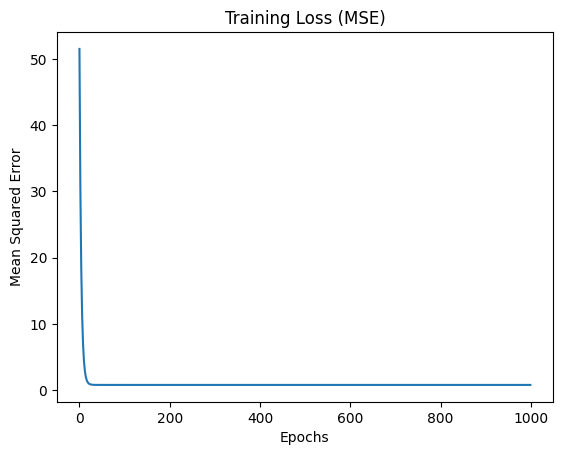

In [12]:
plt.plot(model.mse_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss (MSE)")
plt.show()

MSE decreases over epochs, indicating successful optimization via gradient descent

Evaluation

In [13]:
mse = model.mean_squared_error(y, y_pred)
print("Final MSE:", mse)

Final MSE: 0.8065845639686422
